# Configuration Azure ML service

<img src='https://github.com/retkowsky/images/blob/master/AzureMLservicebanniere.png?raw=true'>

## Infos

In [1]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [2]:
import datetime
maintenant = datetime.datetime.now()
print('Date :', maintenant)

Date : 2019-11-18 10:47:26.720024


## Installation librairie AzureML service

Release notes Azure ML service : https://docs.microsoft.com/en-us/azure/machine-learning/service/azure-machine-learning-release-notes

Installation : https://docs.microsoft.com/en-us/python/api/overview/azure/ml/install?view=azure-ml-py

### Pour installer la première fois (supprimer le # si besoin)

In [3]:
#pip install azureml-sdk

> Redémarrer ensuite le kernel Jupyter

### Pour mettre à jour Azure ML service

In [4]:
#pip install --upgrade azureml-sdk

Penser à mettre à jour les extras et ensuite à relancer le kernel Jupyter

In [5]:
#pip install --upgrade azureml-sdk[automl,notebooks,explain,accel-models,services,tensorboard]

## Version Azure ML service installée

In [6]:
import azureml.core
print("Version = ",azureml.core.VERSION)

Version =  1.0.74


## Connexion workspace

In [7]:
import os
subscription_id = os.environ.get("SUBSCRIPTION_ID", "A RENSEIGNER")
resource_group = os.environ.get("RESOURCE_GROUP", "workshopmlRG")
workspace_name = os.environ.get("WORKSPACE_NAME", "workshopml")

In [8]:
from azureml.core import Workspace

try:
   ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
   ws.write_config()
   print("Le workspace Azure ML service a été trouvé : OK")
except:
   print("Le workspace Azure ML service n'a pas été trouvé")

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code D37ZMFHJ2 to authenticate.
Interactive authentication successfully completed.
Le workspace Azure ML service a été trouvé : OK


In [9]:
# workspace
ws = Workspace.from_config()
print('Workspace name: ' + ws.name, 
      'Azure region: ' + ws.location, 
      'Resource group: ' + ws.resource_group, sep='\n')

Workspace name: workshopml
Azure region: northeurope
Resource group: workshopmlRG


In [10]:
from azureml.core.workspace import Workspace
ws = Workspace.from_config()
ws.get_details()

{'id': '/subscriptions/70b8f39e-8863-49f7-b6ba-34a80799550c/resourceGroups/workshopmlRG/providers/Microsoft.MachineLearningServices/workspaces/WorkshopML',
 'name': 'WorkshopML',
 'location': 'northeurope',
 'type': 'Microsoft.MachineLearningServices/workspaces',
 'tags': {},
 'sku': 'Enterprise',
 'workspaceid': '41e38a77-ac31-4eb1-a1c7-2d4baa6137e7',
 'description': '',
 'friendlyName': '',
 'creationTime': '2019-11-18T10:37:06.7267815+00:00',
 'keyVault': '/subscriptions/70b8f39e-8863-49f7-b6ba-34a80799550c/resourcegroups/workshopmlrg/providers/microsoft.keyvault/vaults/workshopml9217205802',
 'applicationInsights': '/subscriptions/70b8f39e-8863-49f7-b6ba-34a80799550c/resourcegroups/workshopmlrg/providers/microsoft.insights/components/workshopml4971486749',
 'identityPrincipalId': '0759563e-6b37-4362-8e0d-d3fa4eb30140',
 'identityTenantId': '72f988bf-86f1-41af-91ab-2d7cd011db47',
 'identityType': 'SystemAssigned',
 'storageAccount': '/subscriptions/70b8f39e-8863-49f7-b6ba-34a8079955

In [11]:
import logging
import os
import random

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd
from sklearn import datasets

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace

## Création expérimentation

In [12]:
ws = Workspace.from_config()

# Nom de l'expérimentation Azure ML service
experiment_name = 'workshop0'

project_folder = './sampleprojects/workshop0'

experiment = Experiment(ws, experiment_name)

output = {}
output['Version Azure ML service : '] = azureml.core.VERSION
output['Nom du workspace : '] = ws.name
output['Ressource groupe : '] = ws.resource_group
output['Localisation : '] = ws.location
output['Répertoire projet : '] = project_folder
output['Nom expérience : '] = experiment.name
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(data = output, index = ['']).T

,
Version Azure ML service :,1.0.74
Nom du workspace :,workshopml
Ressource groupe :,workshopmlRG
Localisation :,northeurope
Répertoire projet :,./sampleprojects/workshop0
Nom expérience :,workshop0


Date du run =  2019-11-18 10:49:08.598901
Nombre d'observations = 100
Moyenne =  -0.12387465621447945
Ecart Type =  0.8694111392226714


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


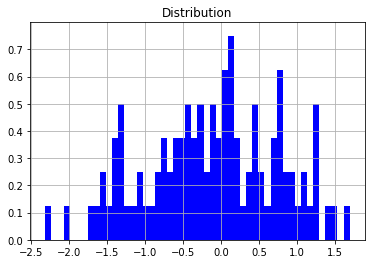

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import datetime
now = datetime.datetime.now()
print('Date du run = ', now)

nobs=100
data = np.random.randn(nobs)
print("Nombre d'observations =", nobs)

moyenne=np.mean(data)
ecartype=np.std(data)
print("Moyenne = ", moyenne)
print("Ecart Type = ", ecartype)

# Run Log
run =  experiment.start_logging()
run.log('Date du run', str(now))
run.log('Nobs', nobs)
run.log('Moyenne', moyenne)
run.log('Ecart Type', ecartype)

# Graphique
hx, hy, _ = plt.hist(data, bins=50, normed=1,color="blue")

plt.ylim(0.0,max(hx)+0.05)
plt.title('Distribution')
plt.grid()

plt.savefig("mongraphique", bbox_inches='tight')
plt.show()

## Azure ML service Studio

https://ml.azure.com/

<img src="https://github.com/retkowsky/images/blob/master/LandingPage.jpg?raw=true">

## Documentation

- Documentation :<br> https://docs.microsoft.com/en-us/azure/machine-learning/

- Nouveautés versions Azure ML service: <br>
https://docs.microsoft.com/en-us/azure/machine-learning/service/azure-machine-learning-release-notes?view=azure-ml-py

- What is Azure ML service SDK?<br>
https://docs.microsoft.com/en-us/python/api/overview/azure/ml/intro?view=azure-ml-py

- Azure ML service CLI<br>
https://docs.microsoft.com/en-us/cli/azure/ext/azure-cli-ml/ml?view=azure-cli-latest

- Azure ML Visual Interface<br>
Algorithm & module reference overview<br>
https://docs.microsoft.com/en-us/azure/machine-learning/algorithm-module-reference/module-reference


<img src="https://github.com/retkowsky/images/blob/master/Powered-by-MS-Azure-logo-v2.png?raw=true" height="300" width="300">